### Q6a)

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from py.xml import raw

from sklearn.linear_model import LinearRegression

In [2]:
saar_data = pd.read_csv('../../datasets/SAAR_elevation.csv')

In [3]:
saar_data

,Name,elevation_m,SAAR_mm,E,N
0,ASK,186,1136,351500,523900
1,OAS,165,889,357910,527500
2,SYH,120,850,358200,522000
3,SLE,212,1166,359300,519200
4,BLA,330,1425,363100,511700
5,KRT,128,776,364400,526700
6,SCA,183,1135,367300,514400
7,APM,150,896,369080,519640
8,ASB,250,1089,369500,512500
9,BRE,175,926,370100,513900


### Check for missing:
* any missing data
* any erroneous data (e.g. negative, or large values which are clearly incorrect)
* any samples which are too small or not matching in size if they are to be compared against other samples

In [4]:
# using isnull() function
saar_data.isnull()

,Name,elevation_m,SAAR_mm,E,N
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [5]:
# Any missing values?
saar_data.isnull().values.any()

False

### Function for calculating estimated coefficient and plotting

In [6]:
# Function for calculating estimated coefficient and plotting

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "g")

    # putting labels
    plt.xlabel('elevation')
    plt.ylabel('rainfall')

    # function to show plot
    plt.show()


### simple linear regression relation between rainfall and elevation

Estimated coefficients:
b_0 = 532.854148643272       
b_1 = 2.576591739677912


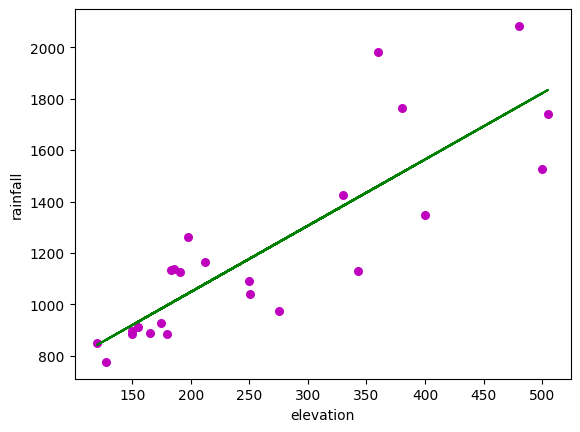

In [7]:
 # observations / data
rainfall = saar_data.SAAR_mm
elevation = saar_data.elevation_m

# estimating coefficients
b = estimate_coef(elevation, rainfall)
print("Estimated coefficients:\nb_0 = {}  \
      \nb_1 = {}".format(b[0], b[1]))

# plotting regression line
plot_regression_line(elevation, rainfall, b)

## Comparing base-line method results with sklearning library funncton

In [8]:
rainfall = rainfall.values
elevation = elevation.values.reshape(-1, 1)
model = LinearRegression().fit(elevation, rainfall)

In [9]:
r_sq = model.score(elevation, rainfall)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7171837853976939


In [10]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: 532.8541486432722
slope: [2.57659174]


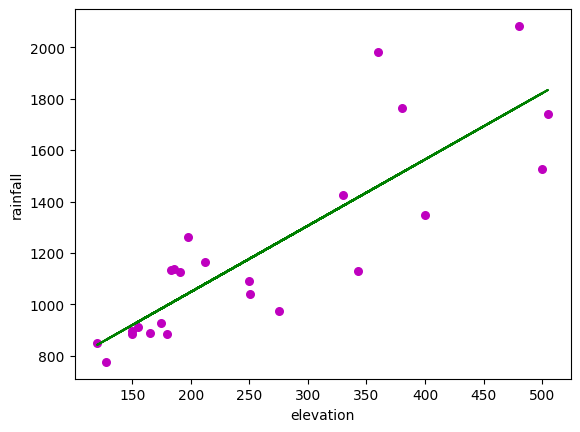

In [11]:
# plotting regression line
plot_regression_line(elevation, rainfall, [model.intercept_, model.coef_])